In [34]:
'''  
理想模型
    y
    |
    |\  /
    | \/
    | /\
    |/  \
    +———————→ x

x = 模型复杂度
y = 误差

偏差 = 过于简化,导致的误差(欠拟合)
模型复杂度越高，偏差越小

方差 = 过于复杂,导致的误差(过拟合)
模型复杂度越高，方差越大

误差的本质 = 偏差 + 方差 + 噪声

最优模型 = 交叉平衡点(偏差，方差)

'''

'  \n理想模型\n    y\n    |\n    |\\  /\n    | \\/\n    | /    |/      +———————→ x\n\nx = 模型复杂度\ny = 误差\n\n偏差 = 过于简化,导致的误差(欠拟合)\n模型复杂度越高，偏差越小\n\n方差 = 过于复杂,导致的误差(过拟合)\n模型复杂度越高，方差越大\n\n误差的本质 = 偏差 + 方差 + 噪声\n\n最优模型 = 交叉平衡点(偏差，方差)\n\n'

In [ ]:
''' 
优化思路 = 所有可变参数都测试一遍

1 训练数据集导致的不同
a bagging = 随机采样 训练多个模型
b 随机森林 = 随机采样 随机选择特征 训练多个模型
c boosting = 对错误样本不断加权 训练多个模型


2 超参数导致的不同
a grid search = 遍历所有超参数


3 验证数据集带来的不稳定
a 留出法 (8训练:2测试)
b k折交叉验证 (5折 = 4训练:1测试 遍历5次)
c 自助法 (有放回抽样)

'''

' \n优化思路 = 所有可变参数都测试一遍\n\n1 训练数据集导致的不同\na bagging = 随机采样 训练多个模型\nb 随机森林 = 随机采样 随机选择特征 训练多个模型\nc boosting = 对错误样本不断加权 训练多个模型\n\n\n2 超参数导致的不同\na grid search = 遍历所有超参数\n\n\n3 验证数据集带来的不稳定\na 一般切分 训练集 验证集\nb k折交叉验证\nc 留一法\n\n'

1 加载数据

In [36]:
import pandas as pd

In [37]:
# 加载数据
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
''' 
gender = 性别
senior citizen = 老年人
partner = 是否有配偶
dependents = 是否有依赖
tenure = 客户在公司的时间
phone service = 是否开通电话服务
multiple lines = 是否开通多条线路
internet service = 是否开通互联网服务
online security = 是否开通在线安全服务
online backup = 是否开通在线备份服务
device protection = 是否开通设备保护服务
tech support = 是否开通技术支持服务
streaming tv = 是否开通电视流服务
streaming movies = 是否开通电影流服务
contract = 合同类型
paperless billing = 是否开通无纸化账单服务
payment method = 支付方式
monthly charges = 月费用
total charges = 总费用

churn = 是否流失 yes=流失 no=不流失
'''

' \ngender = 性别\nsenior citizen = 老年人\npartner = 是否有配偶\ndependents = 是否有依赖\ntenure = 客户在公司的时间\nphone service = 是否开通电话服务\nmultiple lines = 是否开通多条线路\ninternet service = 是否开通互联网服务\nonline security = 是否开通在线安全服务\nonline backup = 是否开通在线备份服务\ndevice protection = 是否开通设备保护服务\ntech support = 是否开通技术支持服务\nstreaming tv = 是否开通电视流服务\nstreaming movies = 是否开通电影流服务\ncontract = 合同类型\npaperless billing = 是否开通无纸化账单服务\npayment method = 支付方式\nmonthly charges = 月费用\ntotal charges = 总费用\n\nchurn = 是否流失 yes=流失 no=不流失\n'

2 清洗数据

In [39]:
# 数据描述
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [40]:
# 数据行列
data.shape

(7032, 20)

In [41]:
# 每一列数据类型
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [42]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
# 查看预测结果的分布
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

3 切分 x y

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data['Churn'].values)
''' 
fit_transform 将数据转换成单列的 数字标签
'''
y

array([0, 0, 1, ..., 0, 1, 0])

In [45]:
x = pd.get_dummies(data.iloc[:, 0:19],drop_first=True,dtype = int)
''' 
get_dummies 独热编码 将分类变量转换为 bool 或 int
get_dummies 的输出为多列0/1的组合

dtype = int 将分类变量转换为 int 第一个=00 第二个= 01
dtype = bool 将分类变量转换为 bool

drop_first=True
原始->  B  C
A      0  0
B      1  0
C      0  1

drop_first=false
原始->  A  B  C
A      1  0  0
B      0  1  0
C      0  0  1
'''
x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x, # 特征数据集
    y, # 标签数据集
    test_size=0.2, # 随机0.2作为测试
    random_state=0 # 随机拆分种子
)

4 训练模型 = 原始方法

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)

In [48]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
# 准确率
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

0.9978666666666667
0.7334754797441365


5 训练模型 = bagging

In [50]:
''' bagging
1 随机采样生成多个子集
2 每个子集训练一个模型
3 多数投票 或 平均值 作为最终结果
'''

' bagging\n1 随机采样生成多个子集\n2 每个子集训练一个模型\n3 多数投票 或 平均值 作为最终结果\n'

In [51]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=0)
bagging.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, random_state=0)

In [52]:
# 准确率
y_train_pred = bagging.predict(x_train)
y_test_pred = bagging.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

0.9978666666666667
0.7825159914712153


6 训练模型 = random forest

In [53]:
''' random forest
1 随机采样生成多个子集(选择不同的特征)
2 每个子集训练一个模型
3 多数投票 或 平均值 作为最终结果
'''

' random forest\n1 随机采样生成多个子集(选择不同的特征)\n2 每个子集训练一个模型\n3 多数投票 或 平均值 作为最终结果\n'

In [54]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
# 准确率
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

0.9976888888888888
0.7910447761194029


7 训练模型 = boosting

In [56]:
''' boosting
1 子集训练 -> 收集预测错误的数据
2 加权错误数据 -> 再次训练
3 重复
4 加权投票
'''

' boosting\n1 子集训练 -> 收集预测错误的数据\n2 加权错误数据 -> 再次训练\n3 重复\n4 加权投票\n'

In [57]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators = 100, random_state=0)
boost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [58]:
y_train_pred = boost.predict(x_train)
y_test_pred = boost.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

0.8076444444444445
0.8002842928216063


8 grid search 超参数调整

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_x = DecisionTreeClassifier(random_state = 0)

In [60]:
# 模型所有超参数
model_x.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [61]:
# 遍历 所有超参数
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'max_leaf_nodes': list(range(2, 50)), 
    'max_depth': np.arange(3, 15),
}

grid = GridSearchCV(model_x, params, cv=10)

In [62]:
# 拟合
# grid 默认为最好的模型
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [63]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=27, random_state=0)

In [ ]:
# 准确率
y_train_pred = grid.predict(x_train)
y_test_pred = grid.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

9 多种验证方式

In [64]:
# k折交叉验证
# 评估模型性能，不会改变原模型
# 1个用来 测试 4个用来 训练 重复5次
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv= 5)
print(scores) # 5次交叉验证的准确率
print(scores.mean()) # 5次交叉验证的平均准确率

[0.73063255 0.72850036 0.72048364 0.72617354 0.74182077]
0.7295221717059894


In [65]:
# 留一法
# 1 个样本 测试 其他所有样本用来 训练
# 消耗计算量 大
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import LeaveOneOut
# scores = cross_val_score(model, x, y, cv= LeaveOneOut())
# print(scores) # 留一法的准确率
# print(scores.mean()) # 留一法的平均准确率

10 作图综合对比

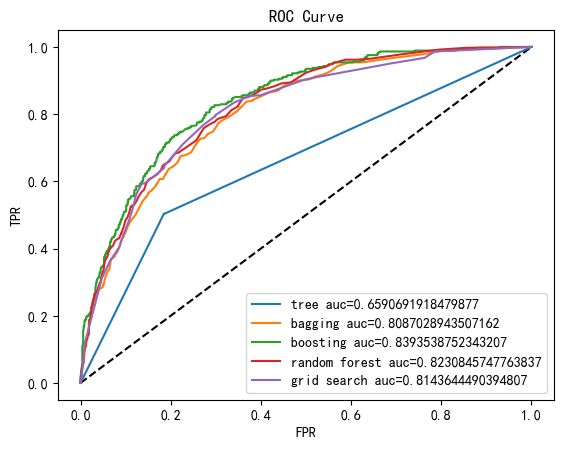

In [66]:
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False




y_pred_model = model.predict_proba(x_test)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_model)
auc1 = metrics.roc_auc_score(y_test, y_pred_model) # auc值

y_pred_bagging = bagging.predict_proba(x_test)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_bagging)
auc2 = metrics.roc_auc_score(y_test, y_pred_bagging) # auc值

y_pred_boost = boost.predict_proba(x_test)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(y_test, y_pred_boost)
auc3 = metrics.roc_auc_score(y_test, y_pred_boost) # auc值

y_pred_forest = forest.predict_proba(x_test)[:,1]
fpr4 , tpr4, thresholds4 = metrics.roc_curve(y_test, y_pred_forest)
auc4 = metrics.roc_auc_score(y_test, y_pred_forest) # auc值

y_pred_grid = grid.predict_proba(x_test)[:,1]
fpr5 , tpr5, thresholds5 = metrics.roc_curve(y_test, y_pred_grid)
auc5 = metrics.roc_auc_score(y_test, y_pred_grid) # auc值


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "tree auc="+str(auc1))
plt.plot(fpr2, tpr2, label= "bagging auc="+str(auc2))
plt.plot(fpr3, tpr3, label= "boosting auc="+str(auc3))
plt.plot(fpr4, tpr4, label= "random forest auc="+str(auc4))
plt.plot(fpr5, tpr5, label= "grid search auc="+str(auc5))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curve')
plt.show()